In [58]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits import mplot3d
import pandas as pd
import math
from os import listdir
from os.path import isfile, join
import os
import itertools
import random

In [59]:
#Read and storage data

#Read the index dictionary
#Revert the index 
index_name = 'seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
        
WD = os.getcwd()
mypath = WD + '/data'
file_output = WD + '/'+ 'seqs_index.dict'

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}

#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        print(f'step={step} for t={t}')
    
    file_name = WD + '/data/' + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)
temps = [30,43]

step=36 for t=30
step=28 for t=30
step=34 for t=43
step=46 for t=43
step=58 for t=30
step=22 for t=30
step=16 for t=43
step=40 for t=30
step=42 for t=43
step=18 for t=30
step=12 for t=43
step=44 for t=30
step=40 for t=43
step=44 for t=43
step=58 for t=43
step=22 for t=43
step=4 for t=30
step=38 for t=30
step=56 for t=43
step=12 for t=30
step=42 for t=30
step=30 for t=30
step=34 for t=30
step=14 for t=43
step=38 for t=43
step=30 for t=43
step=32 for t=43
step=60 for t=43
step=16 for t=30
step=14 for t=30
step=26 for t=30
step=26 for t=43
step=46 for t=30
step=50 for t=43
step=48 for t=43
step=10 for t=43
step=6 for t=30
step=54 for t=30
step=8 for t=43
step=2 for t=43
step=2 for t=30
step=54 for t=43
step=4 for t=43
step=52 for t=30
step=52 for t=43
step=56 for t=30
step=48 for t=30
step=1 for t=43
step=20 for t=43
step=20 for t=30
step=32 for t=30
step=28 for t=43
step=36 for t=43
step=6 for t=43
step=50 for t=30
step=60 for t=30
step=10 for t=30
step=25 for t=30
step=23 for t=30
step=

In [5]:
t=30
L = df[t].columns.tolist()
L.sort()

In [44]:
step = 4   #prev = 2   next =6
df_s = df[t][step]
a = df_s.loc[(df_s!=0)].index.tolist()

next_step = 6
df_s = df[t][next_step]
b = df_s.loc[(df_s!=0)].index.tolist()

inters = list(set(a) & set(b))
death = list(set(a) - set(b))
new = list(set(b) - set(a))
print('Remaining',len(inters)/len(a)*100)
print('Death',len(death)/len(a)*100)
print('New',len(new)/len(b)*100)

Remaining 23.334132310642378
Death 76.66586768935763
New 94.83746088985524


In [ ]:
#How many haplotypes in lst_2 are not in lst_1

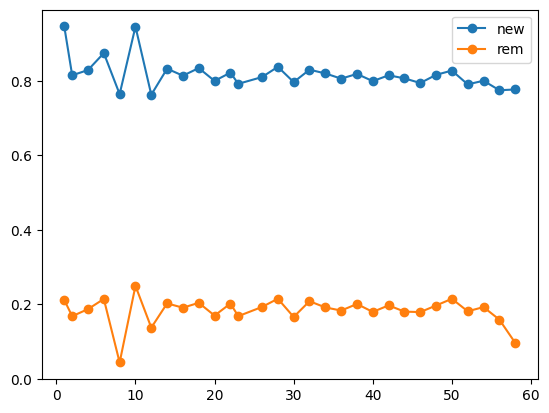

In [60]:
plt.figure()
new_hapls = []
rem_hapls = []
death_hapls = []
t = 43
L = df[t].columns.tolist()
L.sort()
for i,step in enumerate(L[:-1]):
    df_s = df[t][step]
    a = df_s.loc[(df_s!=0)].index.tolist()
    next_step = L[i+1]
    df_s = df[t][next_step]
    b = df_s.loc[(df_s!=0)].index.tolist()

    inters = list(set(a) & set(b))
    death = list(set(a) - set(b))
    new = list(set(b) - set(a))
    
    death_hapls.append(len(death)/len(a))
    new_hapls.append(len(new)/len(b))
    rem_hapls.append(len(inters)/len(a))
    #print(len(death)/len(a)+len(inters)/len(a))
    
#plt.plot(L[:-1],death_hapls, 'o-', label=f'death')
plt.plot(L[:-1],new_hapls, 'o-', label=f'new')
plt.plot(L[:-1],rem_hapls, 'o-', label=f'rem')
plt.legend(loc='best')
plt.show()